# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


['basco',
 'albany',
 'thompson',
 'grange',
 'bethel',
 "port saint john's",
 'west island',
 'tovuz',
 'iqaluit',
 'grytviken',
 'bikenibeu village',
 'adamstown',
 'papatowai',
 'vorgashor',
 'phrae',
 'port mathurin',
 'yagry',
 'port moresby',
 'mahibadhoo',
 'badger',
 'waitangi',
 'iskateley',
 'port lincoln',
 'azovo',
 'nizao',
 'naze',
 'ouadda',
 'avarua',
 'port-aux-francais',
 'jatiroto',
 'yellowknife',
 'xai-xai',
 'holualoa',
 'vila velha',
 'udachny',
 'luderitz',
 'hermanus',
 'olonkinbyen',
 'marshfield',
 'klyuchi',
 'zelenoborskiy',
 'edinburgh of the seven seas',
 'ushuaia',
 'ulanhot',
 'taiohae',
 'punta arenas',
 'staryy dobrotvir',
 'sitka',
 'blackmans bay',
 'san luis de la loma',
 'goryachiy klyuch',
 'rumbek',
 'laayoune',
 'katsuura',
 'lubango',
 'labuan',
 'vallenar',
 'rio grande',
 'jamestown',
 'zhezqazghan',
 'ha giang',
 'noumea',
 'pisco',
 'utrik',
 'palopo',
 'mount isa',
 'aykhal',
 'nogliki',
 'bilibino',
 'camana',
 "ust'-ilimsk",
 'sault ste

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f"{url}&q={city}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] 
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | basco
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | grange
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | port saint john's
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | tovuz
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | bikenibeu village
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | phrae
Processing Record 16 of Set 1 | port mathurin
Processing Record 17 of Set 1 | yagry
City not found. Skipping...
Processing Record 18 of Set 1 | port moresby
Processing Record 19 of Set 1 | mahibadhoo
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | iskateley
Pro

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,basco,20.4487,121.9702,23.37,96,99,3.43,PH,1738355648
1,albany,42.6001,-73.9662,1.00,77,100,1.14,US,1738355649
2,thompson,55.7435,-97.8558,-21.91,64,20,5.14,CA,1738355650
3,grange,-34.9000,138.4833,21.56,65,20,2.06,AU,1738355651
4,bethel,41.3712,-73.4140,4.69,90,100,0.45,US,1738355669


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,basco,20.4487,121.9702,23.37,96,99,3.43,PH,1738355648
1,albany,42.6001,-73.9662,1.00,77,100,1.14,US,1738355649
2,thompson,55.7435,-97.8558,-21.91,64,20,5.14,CA,1738355650
3,grange,-34.9000,138.4833,21.56,65,20,2.06,AU,1738355651
4,bethel,41.3712,-73.4140,4.69,90,100,0.45,US,1738355669


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

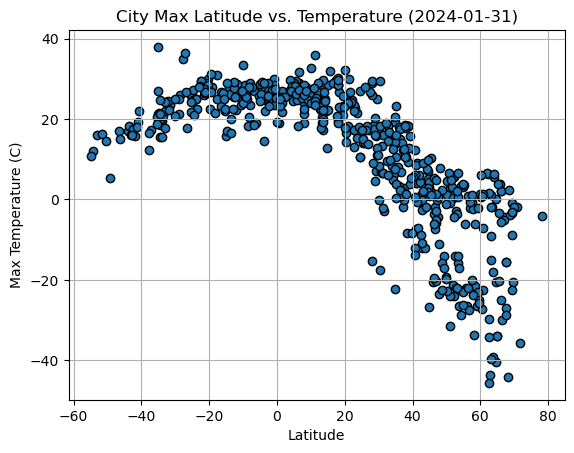

In [54]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-01-31)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

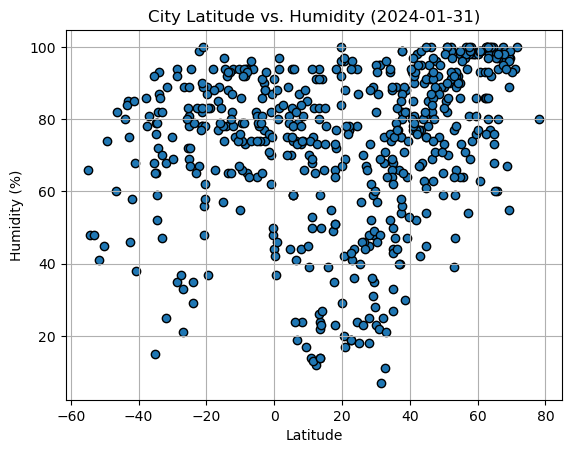

In [5]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(lat, humidity, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-01-31)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

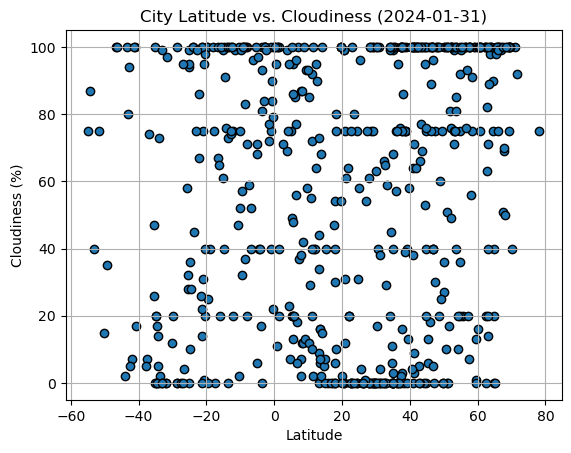

In [6]:
# Build the scatter plots for latitude vs. cloudiness
clouds = city_data_df["Cloudiness"]

plt.scatter(lat, clouds, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-01-31)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

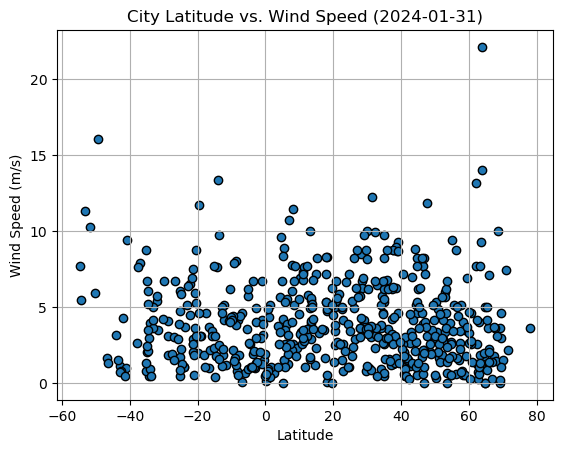

In [7]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]

plt.scatter(lat, wind, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-01-31)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [8]:
# Define a function to create Linear Regression plots
def calculate_linear_regression(x,y, xlabel,ylabel,Title,equation):

    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    regression_line = slope * x + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regression_line, color='red', label='Fit Line')
    plt.title(Title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line, xy=equation)

In [9]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.query("Lat >= 0")
northern_hemi_lat = northern_hemi_df["Lat"]
northern_hemi_temp = northern_hemi_df["Max Temp"]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,basco,20.4487,121.9702,23.37,96,99,3.43,PH,1738355648
1,albany,42.6001,-73.9662,1.00,77,100,1.14,US,1738355649
2,thompson,55.7435,-97.8558,-21.91,64,20,5.14,CA,1738355650
4,bethel,41.3712,-73.4140,4.69,90,100,0.45,US,1738355669
7,tovuz,40.9922,45.6289,4.12,77,0,0.62,AZ,1738355672


In [10]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.query("Lat < 0")
southern_hemi_lat = southern_hemi_df["Lat"]
southern_hemi_temp = southern_hemi_df["Max Temp"]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grange,-34.9000,138.4833,21.56,65,20,2.06,AU,1738355651
5,port saint john's,-31.6229,29.5448,23.41,89,97,3.46,ZA,1738355670
6,west island,-12.1568,96.8225,25.99,94,75,4.12,CC,1738355671
9,grytviken,-54.2811,-36.5092,11.94,48,87,5.45,GS,1738355674
11,adamstown,-25.0660,-130.1015,24.34,69,94,6.06,PN,1738355701


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.663451626866443


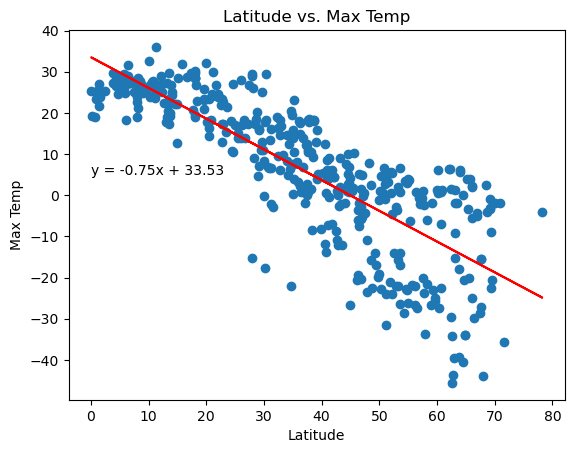

In [56]:
# Linear regression on Northern Hemisphere
calculate_linear_regression(northern_hemi_lat, northern_hemi_temp, "Latitude", "Max Temp", "Latitude vs. Max Temp", (0.05, 5))

The r^2 value is: 0.29977443257325553


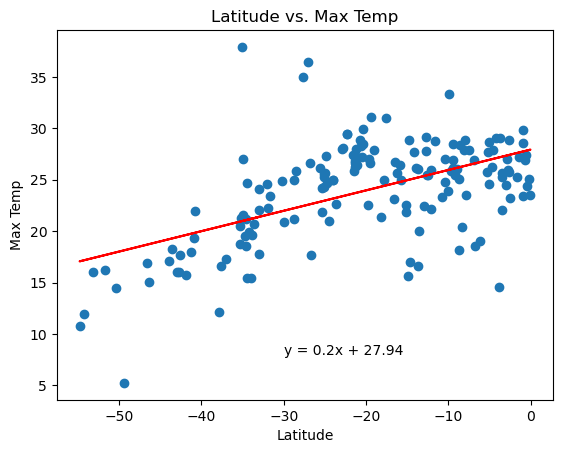

In [55]:
# Linear regression on Southern Hemisphere
calculate_linear_regression(southern_hemi_lat, southern_hemi_temp, "Latitude", "Max Temp", "Latitude vs. Max Temp", (-30, 8))

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and max temperature in the Northern Hemisphere. As the latitude increases (moves North away from the equator), max temperature decreases.

For the Southern Hemisphere, there is a positive correlation but weaker than the Northern Hemisphere based on the linear regression line.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.19050381367397035


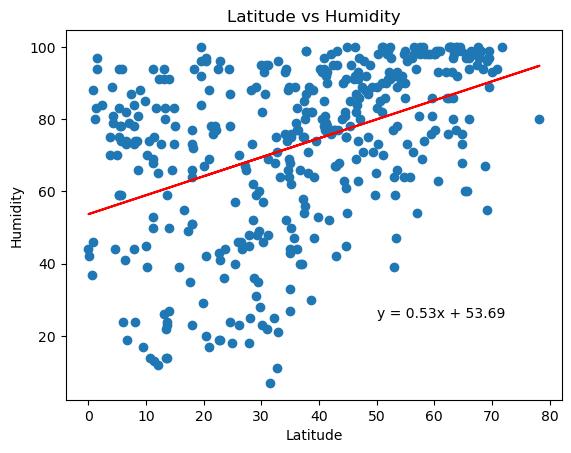

In [36]:
# Northern Hemisphere 
northern_hemi_humidity = northern_hemi_df["Humidity"]

calculate_linear_regression(northern_hemi_lat, northern_hemi_humidity, "Latitude", "Humidity", "Latitude vs Humidity", (50,25))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_lat, northern_hemi_humidity)

# Compute R-squared
r_squared = r_value**2

print(f"The r^2 value is: {r_squared}")

The r^2 value is: 0.08942931548270869


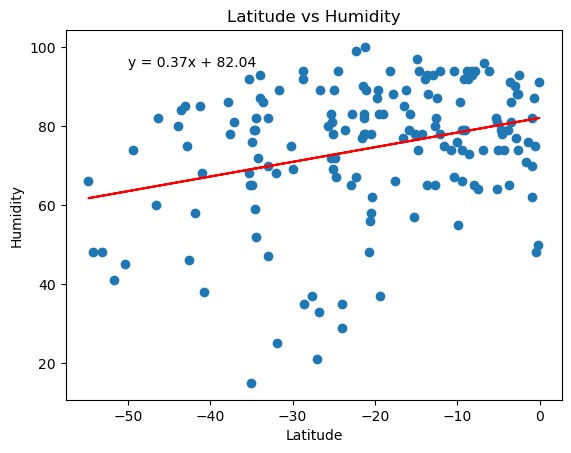

In [35]:
# Southern Hemisphere
southern_hemi_humidity = southern_hemi_df["Humidity"]

calculate_linear_regression(southern_hemi_lat, southern_hemi_humidity, "Latitude", "Humidity", "Latitude vs Humidity", (-50, 95))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_lat, southern_hemi_humidity)

# Compute R-squared
r_squared = r_value**2

print(f"The r^2 value is: {r_squared}")

**Discussion about the linear relationship:** There is a weak positive correlation between latitude and humidity in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.07185393138620881


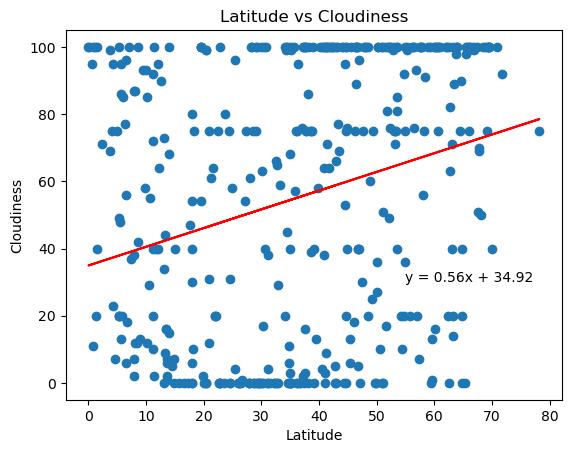

In [45]:
# Northern Hemisphere
northern_hemi_clouds = northern_hemi_df["Cloudiness"]

calculate_linear_regression(northern_hemi_lat, northern_hemi_clouds, "Latitude", "Cloudiness", "Latitude vs Cloudiness", (55,30))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_lat, northern_hemi_clouds)

# Compute R-squared
r_squared = r_value**2

print(f"The r^2 value is: {r_squared}")

The r^2 value is: 0.08742318415403441


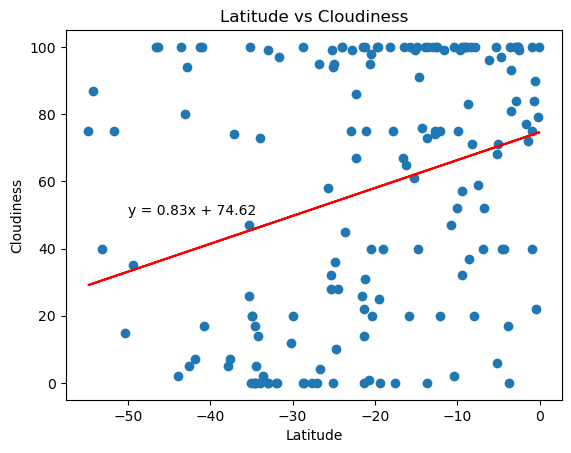

In [47]:
# Southern Hemisphere
southern_hemi_clouds = southern_hemi_df["Cloudiness"]

calculate_linear_regression(southern_hemi_lat, southern_hemi_clouds, "Latitude", "Cloudiness", "Latitude vs Cloudiness", (-50,50))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_lat, southern_hemi_clouds)

# Compute R-squared
r_squared = r_value**2

print(f"The r^2 value is: {r_squared}")

**Discussion about the linear relationship:** The relationship of latitude to Cloudiness in both hemisphere is positive but weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.012170170619523043


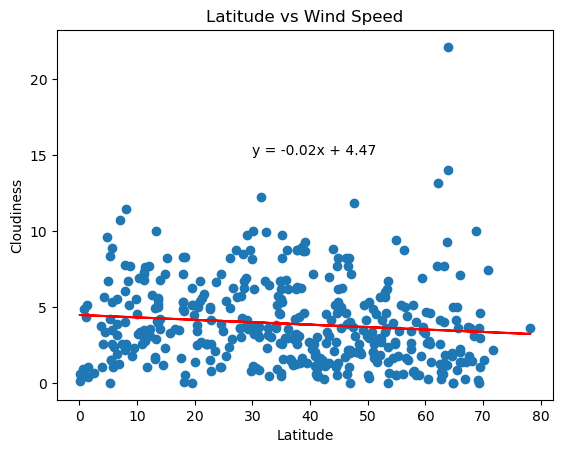

In [50]:
# Northern Hemisphere
northern_hemi_wind = northern_hemi_df["Wind Speed"]

calculate_linear_regression(northern_hemi_lat, northern_hemi_wind, "Latitude", "Cloudiness", "Latitude vs Wind Speed", (30, 15))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_lat, northern_hemi_wind)

# Compute R-squared
r_squared = r_value**2

print(f"The r^2 value is: {r_squared}")

The r^2 value is: 0.044977458539628715


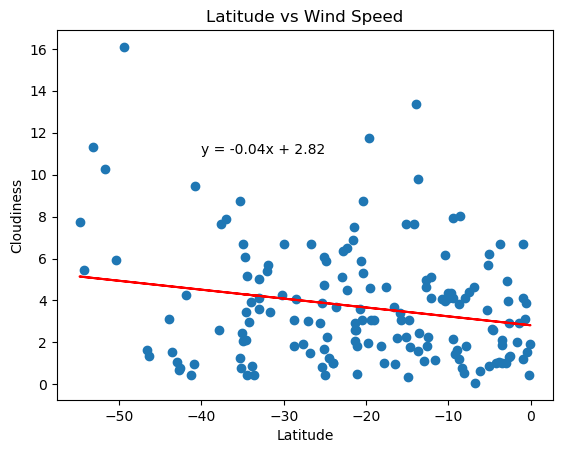

In [53]:
# Southern Hemisphere
southern_hemi_wind = southern_hemi_df["Wind Speed"]

calculate_linear_regression(southern_hemi_lat, southern_hemi_wind, "Latitude", "Cloudiness", "Latitude vs Wind Speed", (-40, 11))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_lat, southern_hemi_wind)

# Compute R-squared
r_squared = r_value**2

print(f"The r^2 value is: {r_squared}")

**Discussion about the linear relationship:** For Latitude vs. Wind Speed, the relationship is very weakly negative in both hemispheres.